In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
raw_data_path=os.path.join('data','raw')

In [3]:
df=pd.read_excel(os.path.join(raw_data_path,'Final_Train.xlsx'))

In [4]:
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
5,BAMS,8 years experience,NaN,"Porur, Chennai",Ayurveda,NaN,100
6,BHMS,42 years experience,NaN,"Karol Bagh, Delhi",Homeopath,NaN,200
7,BDS,10 years experience,99%,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200
8,"MBBS, MD - General Medicine",14 years experience,NaN,"Old City, Hyderabad",General Medicine,NaN,100
9,"BSc, BDS",23 years experience,NaN,"Athani, Ernakulam",Dentist,NaN,100


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
Qualification         5961 non-null object
Experience            5961 non-null object
Rating                2659 non-null object
Place                 5936 non-null object
Profile               5961 non-null object
Miscellaneous_Info    3341 non-null object
Fees                  5961 non-null int64
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [13]:
def extract_years(a):
    a=a.split(' ')
    return a[0]

In [15]:
e=df.Experience.apply(extract_years)

In [17]:
e=e.astype(np.float32)

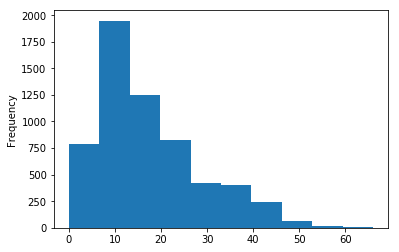

In [19]:
e.plot(kind='hist')

In [20]:
df.Qualification

0                                   BHMS, MD - Homeopathy
1                            BAMS, MD - Ayurveda Medicine
2                          MBBS, MS - Otorhinolaryngology
3                                     BSc - Zoology, BAMS
4                                                    BAMS
5                                                    BAMS
6                                                    BHMS
7                                                     BDS
8                             MBBS, MD - General Medicine
9                                                BSc, BDS
10                                    MBBS, MS, DNB - ENT
11                                                   BAMS
12                                               BDS, MDS
13                BDS, MDS - Oral & Maxillofacial Surgery
14      MBBS, Diploma in Otorhinolaryngology (DLO), DN...
15                            MBBS, MD - General Medicine
16             MBBS, Diploma in Otorhinolaryngology (DLO)
17            

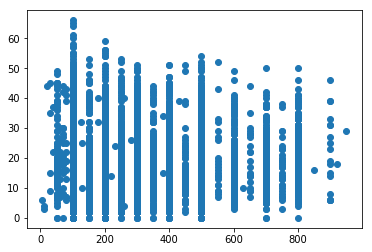

In [21]:
plt.scatter(df.Fees,e)

In [23]:
df.Qualification.apply(str.split,args=' ')

0                              [BHMS,, MD, -, Homeopathy]
1                      [BAMS,, MD, -, Ayurveda, Medicine]
2                     [MBBS,, MS, -, Otorhinolaryngology]
3                                [BSc, -, Zoology,, BAMS]
4                                                  [BAMS]
5                                                  [BAMS]
6                                                  [BHMS]
7                                                   [BDS]
8                       [MBBS,, MD, -, General, Medicine]
9                                             [BSc,, BDS]
10                              [MBBS,, MS,, DNB, -, ENT]
11                                                 [BAMS]
12                                            [BDS,, MDS]
13        [BDS,, MDS, -, Oral, &, Maxillofacial, Surgery]
14      [MBBS,, Diploma, in, Otorhinolaryngology, (DLO...
15                      [MBBS,, MD, -, General, Medicine]
16       [MBBS,, Diploma, in, Otorhinolaryngology, (DLO)]
17            

In [94]:
s=set({})

In [95]:
def extract_qualifications(a,s):
    a=a.split(',')
    for i in a:
        if 'fellowship' in i.lower():
            s.add('Fellowship')
        elif 'post graduate diploma' in i.lower() or 'pg diploma' in i.lower() or 'pgd' in i.lower() or 'postgraduate' in i.lower():
            s.add('PGD')
        elif 'certificate' in i.lower() or 'certification' in i.lower() or 'cert.' in i.lower() or 'certified' in i.lower():
            s.add('Certificate')
        else:
            s.add(i.split('-')[0])

In [96]:
df.Qualification.apply(lambda a: extract_qualifications(a,s))

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
5931    None
5932    None
5933    None
5934    None
5935    None
5936    None
5937    None
5938    None
5939    None
5940    None
5941    None
5942    None
5943    None
5944    None
5945    None
5946    None
5947    None
5948    None
5949    None
5950    None
5951    None
5952    None
5953    None
5954    None
5955    None
5956    None
5957    None
5958    None
5959    None
5960    None
Name: Qualification, Length: 5961, dtype: object

In [97]:
len(s)

448

In [50]:
df.Qualification[14].split(',')

['MBBS', ' Diploma in Otorhinolaryngology (DLO)', ' DNB - ENT']

In [98]:
s

{' ACDMC',
 ' ACLS',
 ' AFIH',
 ' AMI Essentials',
 ' AOC in Aesthetic Dentistry',
 ' Advance Course In Osteoporosis',
 ' Advance Diploma in Nutrition and Dietetics',
 ' Advanced Course in Cosmetology and Aesthetic Medicine',
 ' Advanced Endotontic Course On Root Canal',
 ' Advanced Training Program in Diabetes Care',
 ' Advanced Trauma Life Support (ATLS)',
 ' Ayurvedic panchkarma',
 ' B.Sc',
 ' BA',
 ' BAMS',
 ' BDS',
 ' BEMS',
 ' BHMS',
 ' BNYS',
 ' BPTh/BPT',
 ' BSAM',
 ' BSc ',
 ' Bachelor of Acupuncture ',
 ' Bachelor of Chiropractic',
 ' Basic Life Support (BLS)',
 ' CCD (Diabetology)',
 ' CCDR',
 ' CCEBDM',
 ' CCEDM',
 ' CCMTD',
 ' CCST ',
 ' CCT ',
 ' CGO',
 ' CSD',
 ' CVD',
 ' Clinical Nutritionist certifcate',
 ' Comprehensive Course in Modern Endodontics',
 ' Current Concepts in American Dentistry Advances in Implantology and Oral Rehabilitation',
 ' D. Dermatology (Ay.)',
 ' D.Ac',
 ' D.D',
 ' D.LITT ',
 ' D.Ortho Fellow Arthroscopy & Arthroplasty(AUST)',
 ' D.Sc',
 ' D.Y.

In [57]:
'DNB'.split('-')[0]

'DNB'

In [79]:
df[df.Qualification.apply(lambda a: 'germany' in a)].Qualification[812].split(', ')

['BHMS', 'P.G.Hom.(London)', 'fellowship in medical cosmetology,germany']

In [85]:
'SD'.lower()

'sd'